In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil

#from rope.base.oi.soa import analyze_module
from scipy.stats import linregress
import libraries as lib

In [15]:
directory = "../../../OneDrive - HvA/Logfiles/SOLAR/2023/20230615_testvaart_Amstel/0014 - 20230615T131248 3h14m8s 22.186km Duivendrecht"
file_accu = "9_3_PHASE.csv"
file_master = "1_MASTER.csv"

In [16]:
data_file_accu = lib.DataInladen(f'{directory}/{file_accu}',debug=False)
data_file_master = lib.DataInladen(f'{directory}/{file_master}',debug=False)

C:\Users\quinc\OneDrive - HvA\Jaar_4\Clean_Mobility_Git\libraries.py:49: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [17]:
data_file_accu

,Datalogger port,"Dataloggertijd, in s",Format header (>10|04),Systeemtijd sinds laatste reset [ms],Encoder,RPM,ID-set,IQ-set,ID-filt (PV),IQ-filt (PV),...,CTRL_Throttle,CTRL_current [A],Temp_PCB_Top [V],Temp_PCB_Bottom [V],Temp_FET_Vtop [V],Temp_FET_Vbot [V],Temp_koper_V [V],Temp_Motor_1 [Celsius],Temp_Motor_2 [Celsius],Temp_Ambient [Celsius]
0,9,331.7708,10|04,202703,482,0,0.0,0.0,1,2,...,0.0,0.0,30.0,30.0,24.0,24.0,24.0,26.0,26.0,23.0
1,9,331.7773,10|04,202711,482,0,0.0,0.0,1,2,...,0.0,0.0,30.0,30.0,24.0,24.0,24.0,26.0,26.0,23.0
2,9,331.7841,10|04,202715,482,-1,0.0,0.0,1,2,...,0.0,0.0,30.0,30.0,24.0,24.0,24.0,26.0,26.0,23.0
3,9,331.7907,10|04,202723,482,0,0.0,0.0,1,2,...,0.0,0.0,30.0,30.0,24.0,24.0,24.0,26.0,26.0,23.0
4,9,331.7973,10|04,202731,482,0,0.0,0.0,1,2,...,0.0,0.0,30.0,30.0,24.0,24.0,24.0,26.0,26.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842740,9,11541.3161,10|04,19659,214,0,0.0,0.0,-2,-3,...,0.0,0.0,39.0,39.0,30.0,30.0,30.0,25.0,25.0,28.0
842741,9,11541.3228,10|04,19667,214,0,0.0,0.0,-2,-3,...,0.0,0.0,39.0,39.0,30.0,30.0,30.0,25.0,25.0,28.0
842742,9,11541.3296,10|04,19671,214,0,0.0,0.0,-1,-3,...,0.0,0.0,39.0,39.0,30.0,30.0,30.0,25.0,25.0,28.0
842743,9,11541.3364,10|04,19679,214,0,0.0,0.0,-1,-3,...,0.0,0.0,39.0,39.0,30.0,30.0,30.0,25.0,25.0,28.0


In [18]:
# Apply the function using the correct time columns
merged_df = lib.resample_and_merge(data_file_master, data_file_accu, freq='1s')

merged_df

,Datalogger port_x,Tijd,Latitude,Longitude,Snelheid over de grond in km/h,Richting van de snelheid,Datum,Magnetische variatie,Magnetische directie,Data in balancers,...,CTRL_Throttle,CTRL_current [A],Temp_PCB_Top [V],Temp_PCB_Bottom [V],Temp_FET_Vtop [V],Temp_FET_Vbot [V],Temp_koper_V [V],Temp_Motor_1 [Celsius],Temp_Motor_2 [Celsius],Temp_Ambient [Celsius]
"Dataloggertijd, in s",,,,,,,,,,,,,,,,,,,,,
0 days 00:05:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,30.0,30.0,24.0,24.0,24.0,26.0,26.0,23.0
0 days 00:05:33,1.0,111249.0,5219.8936,453.9587,0.0,221.6,150623.0,NaN,NaN,111001011.0,...,0.0,0.0,30.0,30.0,24.0,24.0,24.0,26.0,26.0,23.0
0 days 00:05:34,1.0,111250.0,5219.8936,453.9587,0.0,221.6,150623.0,NaN,NaN,111001011.0,...,0.0,0.0,30.0,30.0,24.0,24.0,24.0,26.0,26.0,23.0
0 days 00:05:35,1.0,111251.0,5219.8936,453.9587,0.0,221.6,150623.0,NaN,NaN,111001011.0,...,0.0,0.0,30.0,30.0,24.0,24.0,24.0,26.0,26.0,23.0
0 days 00:05:36,1.0,111252.0,5219.8936,453.9587,0.0,221.6,150623.0,NaN,NaN,111001011.0,...,0.0,0.0,30.0,30.0,24.0,24.0,24.0,26.0,26.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 03:19:36,1.0,142652.0,5219.9052,453.9402,0.0,1.9,150623.0,NaN,NaN,111001011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 03:19:37,1.0,142653.0,5219.9052,453.9402,0.0,1.9,150623.0,NaN,NaN,111001011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 03:19:38,1.0,142654.0,5219.9052,453.9402,0.0,1.9,150623.0,NaN,NaN,111001011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
xas = 'Snelheid over de grond in km/h'
yas = 'CTRL_current [A]'
#zas = ''
# Filtering the data so it's only the laps we want to analyze
# First filter so that the data without GPS data is removed
#data_file_filtered = merged_df[merged_df[xas] != 0]
#data_file_filtered = merged_df[merged_df[yas] != 0]

# Now filter out the beginning and end of the data, by removing the first and last 10% of the data
from math import ceil
#data_file
#data_file = data_file.iloc[ceil(len(data_file)*0.215):ceil(len(data_file)*0.267)]

# Display the filtered data
#data_file_filtered

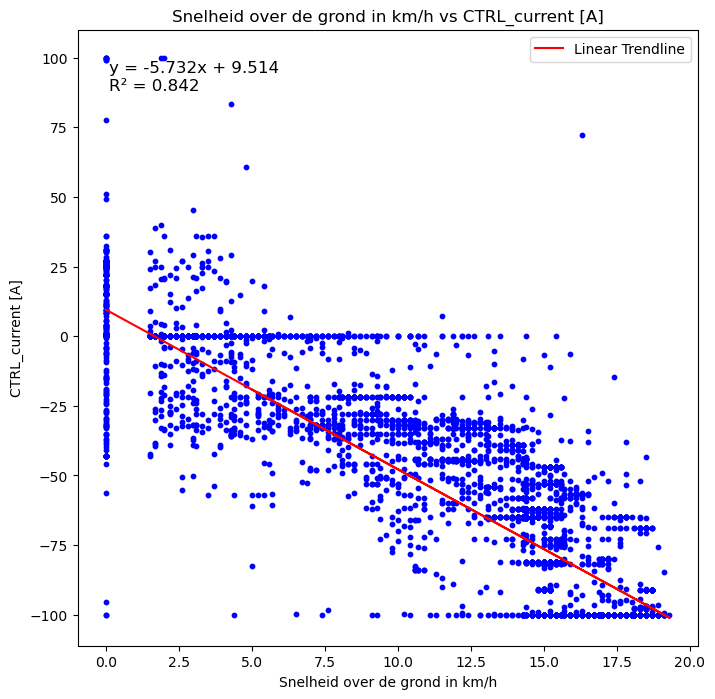

In [21]:
plotten = lib.plot_data(merged_df, xas, yas, trendline='linear', degree=1)